# Lab | Multi-modal output agent

**Create another version of the prompts below to query the dall-e vision AI model following the example shown in this notebook.**

# Multi-modal outputs: Image & Text

This notebook shows how non-text producing tools can be used to create multi-modal agents.

This example is limited to text and image outputs.

In [1]:
! pip install langchain langchain_openai langchain_community

In [2]:
from langchain.agents import AgentType, initialize_agent
from langchain.agents import AgentExecutor, create_react_agent
from langchain_openai import OpenAI
from langchain import hub
from langchain.tools import SteamshipImageGenerationTool as OriginalSteamshipImageGenerationTool

In [3]:
import os
from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv())

OPENAI_API_KEY  = os.getenv('OPENAI_API_KEY')


## Dall-E

In [4]:
import openai
from langchain.tools import tool
from langchain.agents import initialize_agent, AgentType
from langchain.chat_models import ChatOpenAI
import sys

In [5]:
# Detect if the environment is Colab
try:
    import google.colab  # If in Colab
    is_colab = True
except ImportError:
    is_colab = False

# Set your OpenAI API key
openai.api_key = os.getenv('OPENAI_API_KEY')


In [6]:
import openai
from google.colab import userdata

# Get API key
os.environ["OPENAI_API_KEY"] = userdata.get("OPENAI_API_KEY")


In [7]:
# Global variable to capture image URL
latest_image_url = None

@tool
def generate_image(prompt: str) -> str:
    """Generate an image using DALL·E based on the given prompt."""
    global latest_image_url
    response = openai.images.generate(
        model="dall-e-3",
        prompt=prompt,
        n=1,
        size="1024x1024"
    )
    image_url = response.data[0].url
    latest_image_url = image_url
    return image_url


In [15]:
# Initialize the agent
tools = [generate_image]
llm = ChatOpenAI(temperature=0)

mrkl = initialize_agent(
    tools=tools,
    llm=llm,
    agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
    verbose=True
)

# Run the agent
result = mrkl.invoke("How would you visualize a parrot playing soccer?")




> Entering new AgentExecutor chain...
I should use the generate_image tool to create an image of a parrot playing soccer.
Action: generate_image
Action Input: "parrot playing soccer"
Observation: https://oaidalleapiprodscus.blob.core.windows.net/private/org-Du1gAUbRyFtobNoBcGWsfeTT/user-TRk0bGWAa3RWYWWF2qZyKj7L/img-2UAHDy2bGltN0U4qIC8hlA4f.png?st=2025-04-21T05%3A59%3A03Z&se=2025-04-21T07%3A59%3A03Z&sp=r&sv=2024-08-04&sr=b&rscd=inline&rsct=image/png&skoid=cc612491-d948-4d2e-9821-2683df3719f5&sktid=a48cca56-e6da-484e-a814-9c849652bcb3&skt=2025-04-20T12%3A03%3A16Z&ske=2025-04-21T12%3A03%3A16Z&sks=b&skv=2024-08-04&sig=tCiMhsBUhLLH7gf1Xn1RbzW1HOJ/cukieFMdZJFamOI%3D
Thought:I have successfully generated an image of a parrot playing soccer.
Final Answer: The visualization of a parrot playing soccer can be seen in the generated image.

> Finished chain.


In [16]:

# Display the image based on the environment
if is_colab:
    # Colab: Use IPython to display image inline
    from IPython.display import Image, display
    display(Image(url=latest_image_url))
else:
    # Local: Use PIL or other method to show the image
    from PIL import Image as PILImage
    import requests
    from io import BytesIO

    # Download and display image
    response = requests.get(latest_image_url)
    img = PILImage.open(BytesIO(response.content))
    img.show()  # This will open the image using the default image viewer


## StableDiffusion

In [10]:
! pip install diffusers

In [11]:
from diffusers import StableDiffusionPipeline
import torch
import matplotlib.pyplot as plt

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

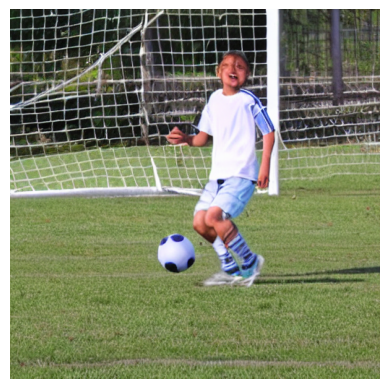

In [14]:
model_id = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

prompt = "How would you visualize a parot playing soccer?"
image = pipe(prompt).images[0]



# Display the image using matplotlib
plt.imshow(image)
plt.axis('off')
plt.show()



## AutoPipelineForText2Image

model_index.json:   0%|          | 0.00/685 [00:00<?, ?B/s]

Fetching 18 files:   0%|          | 0/18 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.78G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/459 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/586 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/704 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/855 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.78k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/10.3G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/607 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

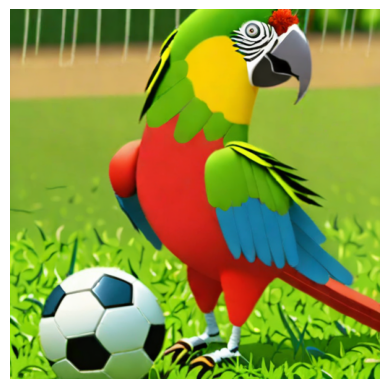

In [13]:
from diffusers import AutoPipelineForText2Image

pipe = AutoPipelineForText2Image.from_pretrained(
    "stabilityai/sdxl-turbo",
    torch_dtype=torch.float16
).to("cuda")

image = pipe("How would you visualize a parot playing soccer?").images[0]




# Display the image using matplotlib
plt.imshow(image)
plt.axis('off')
plt.show()


